<!-- Notebook title -->
# Vanilla KNN

# 1. Notebook Description

### 1.1 Task Description
<!-- 
- A brief description of the problem you're solving with machine learning.
- Define the objective (e.g., classification, regression, clustering, etc.).
-->

#### Implement and Evaluate the K-Nearest Neighbors (KNN) Algorithm from Scratch

In this task, you will implement the K-Nearest Neighbors (KNN) algorithm using only Python, without the use of any machine learning libraries like scikit-learn. You will then evaluate the performance of your implementation using various metrics.

##### Download the Dataset

Use the Pima Indian dataset, which can be found [here](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).

##### Implement the KNN Classifier

- Implement the K-Nearest Neighbors (KNN) algorithm from scratch. Your implementation should include:
  - Calculation of distances between instances.
  - Selecting K neighbors to identify the nearest neighbors.
  - Voting mechanism to predict the class of a data point based on its neighbors.

##### Predict the Classes

- Use your KNN implementation to predict the two classes in the Pima Indian dataset (diabetic or non-diabetic).

##### Hyperparameter Tuning

- Experiment with different values of the hyperparameter `K` (number of neighbors) to find the best fit for the model.
- Discuss how the choice of `K` affects the model’s performance.

##### Evaluate the Algorithm

- Evaluate the performance of your KNN implementation using the following metrics:
  - **Accuracy**: The ratio of correctly predicted instances to the total instances.
  - **F1 Score**: The harmonic mean of precision and recall.
  - **Precision**: The ratio of correctly predicted positive observations to all predicted positive observations.
  - **Recall**: The ratio of correctly predicted positive observations to all observations in that actual class.
  - **Mean Squared Error (MSE)**: The average of the squares of the errors between the predicted and actual values.
  - **Confusion Matrix**: A table that describes the performance of the classification model by showing the true positives, true negatives, false positives, and false negatives.

- Plot accuracy and loss graphs (plot an accuracy and loss graph).

##### Additional Instructions

- Choose the network architecture with care.
- Train and validate all algorithms.
- Make the necessary assumptions.

---

# 2. Setup

## 2.1 Imports
<!--
- Import necessary libraries (e.g., `numpy`, `pandas`, `matplotlib`, `scikit-learn`, etc.).
-->

In [1]:
# print python path

import sys
print(sys.path)

['/home/jon/projects/ikt450/assignments/1_knn/notebooks', '/home/jon/projects/PowerPricePrediction', '/home/jon/projects/ikt450', '/home/jon/projects/ikt457', '/home/jon/projects/pwc', '/home/jon/projects/prompt_engineering', '/home/jon/projects', '/home/jon/miniconda3/envs/pytorch_env/lib/python310.zip', '/home/jon/miniconda3/envs/pytorch_env/lib/python3.10', '/home/jon/miniconda3/envs/pytorch_env/lib/python3.10/lib-dynload', '', '/home/jon/.local/lib/python3.10/site-packages', '/home/jon/miniconda3/envs/pytorch_env/lib/python3.10/site-packages']


In [2]:
from ikt450.src.common_imports import *
from ikt450.src.config import get_paths
from ikt450.src.common_func import load_dataset, save_dataframe, ensure_dir_exists

## 2.2 Global Variables
<!--
- Define global constants, paths, and configuration settings used throughout the notebook.
-->

### 2.2.1 Paths

In [3]:
paths = get_paths()

### 2.2.2 Seed

In [4]:
RANDOM_SEED = 7

### 2.2.3 Split ratio

In [5]:
SPLITRATIO = 0.8

### 2.2.4 Results

In [6]:
results = []

## 2.3 Function Definitions
<!--
- Define helper functions that will be used multiple times in the notebook.
- Consider organizing these into separate sections (e.g., data processing functions, model evaluation functions).
-->

### 2.3.1 Distance Calculation

#### 2.3.1.1 Euclidian Distance

In [7]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [8]:
def distance(one,two):
    return np.linalg.norm(one-two)

### 2.3.2 K-Nearest Neighbors

In [9]:
def knn(X_train, y_train, X_test, k):
    y_pred = []
    for x_test in X_test:
        # Calculate distances between x_test and all training samples
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        # Get the indices of k-nearest neighbors
        k_indices = np.argsort(distances)[:k]
        # Get the labels of the k-nearest neighbors
        k_nearest_labels = [y_train[i] for i in k_indices]
        # Determine the most common class label
        most_common = Counter(k_nearest_labels).most_common(1)
        y_pred.append(most_common[0][0])
    return np.array(y_pred)

---

# 3. System Setup 
<!-- (Optional but recommended) -->

## 3.1 Styling
<!--
- Set up any visual styles (e.g., for plots).
- Configure notebook display settings (e.g., `matplotlib` defaults, pandas display options).
-->

## 3.2 Environment Configuration
<!--
- Check system dependencies, versions, and ensure reproducibility (e.g., set random seeds).
-->

### 3.2.1 Seed

In [10]:
np.random.seed(RANDOM_SEED)

---

# 4. Data Processing

## 4.1 Data loading
<!--
- Load datasets from files or other sources.
-->

In [11]:
%ls {paths['PATH_COMMON_DATASETS']}

balloon_dataset/  ecoli.names  pima-indians-diabetes.data.csv
ecoli.data        food11/


In [12]:
df = pd.read_csv(f"{paths['PATH_COMMON_DATASETS']}/pima-indians-diabetes.data.csv", delimiter=",")

## 4.2 Data inspection
<!--
- Preview the data (e.g., `head`, `describe`).
-->

### 4.2.1 Info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 4.2.2 Describe

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 4.2.3 Head

In [15]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 4.3 Data Cleaning
<!--
- Handle missing values, outliers, and inconsistencies.
- Remove or impute missing data.
-->

### 4.3.1 NULL, NaN, Missing values

In [16]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [17]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.duplicated().sum()

0

In [19]:
#df.corr()

## 4.4 Feature Engineering
<!--
- Create new features from existing data.
- Normalize or standardize features.
- Encode categorical variables.
-->

## 4.6 Data Splitting
<!--
- Split data into training, validation, and test sets.
-->

In [20]:
dataset = df.to_numpy()

In [21]:
np.random.shuffle(dataset)

In [22]:
# Split the dataset into training and validation sets
X_train = dataset[:int(len(dataset)*SPLITRATIO), 0:8]
X_val = dataset[int(len(dataset)*SPLITRATIO):, 0:8]
Y_train = dataset[:int(len(dataset)*SPLITRATIO), 8]
Y_val = dataset[int(len(dataset)*SPLITRATIO):, 8]

In [23]:
# Standardization step
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val = (X_val - X_train.mean(axis=0)) / X_train.std(axis=0)

In [24]:
print(X_train)
print(Y_train)

[[-0.83643661 -1.03771391 -0.39900222 ... -0.6550122   0.30404563
  -0.80057075]
 [ 0.89470523  1.94455268  0.75289391 ...  0.45435501  0.32199314
   1.47981788]
 [ 2.62584707  0.99416003  1.06704739 ... -0.70601759  0.75572463
   0.80414718]
 ...
 [ 2.04879979  0.53534978  0.22930476 ...  0.4798577   0.23524684
   1.39535905]
 [-0.83643661 -0.51335935  0.33402259 ...  0.65837656 -0.84160376
  -0.63165307]
 [ 1.76027615 -0.97216959 -0.39900222 ... -0.82077971 -0.93134131
  -0.20935888]]
[0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 

---

# 5. Model Development

## 5.1 Model Selection
<!--
- Choose the model(s) to be trained (e.g., linear regression, decision trees, neural networks).
-->

In [25]:
from ikt450.common.classes.knn import KNN
knn = KNN(k=3)

## 5.2 Model Training
<!--
- Train the selected model(s) using the training data.
-->

In [26]:
knn.fit(X_train, Y_train)

## 5.3 Model Evaluation
<!--
- Evaluate model performance on validation data.
- Use appropriate metrics (e.g., accuracy, precision, recall, RMSE).
-->

In [27]:
tmp = knn.evaluate(X_val, Y_val)

accuracy = tmp['accuracy']
precision = tmp['precision']
recall = tmp['recall']
f1_score = tmp['f1']
mse = tmp['mse']
rmse = tmp['rmse']
mae = tmp['mae']
del tmp

In [28]:
results.append({
    'approach': 'Custom KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1_score,
    'mse': mse,
    'rmse': rmse,
    'mae': mae
})

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load dataset using Pandas
df = pd.read_csv(f"{paths['PATH_COMMON_DATASETS']}/pima-indians-diabetes.data.csv", delimiter=",")

# Convert the DataFrame to a NumPy array
dataset = df.to_numpy()

# Shuffle the dataset
np.random.shuffle(dataset)

# Split the dataset into input (X) and output (Y) variables
X = dataset[:, 0:8]
y = dataset[:, 8]

# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=7)

# standarization (if required)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val = (X_val - X_train.mean(axis=0)) / X_train.std(axis=0)

# Create an instance of the KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model with training data
knn.fit(X_train, Y_train)

# Predict the class labels for the validation set
y_pred = knn.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(Y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Error metrics
mse = np.mean((y_val - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_val - y_pred))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Accuracy: 0.44805194805194803
Precision: 0.3978494623655914
Recall: 0.6065573770491803
F1 Score: 0.4805194805194805
Mean Squared Error: 0.5194805194805194
Root Mean Squared Error: 0.7207499701564472
Mean Absolute Error: 0.5194805194805194


In [30]:
results.append({
    'approach': 'Sklearn KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'mse': mse,
    'rmse': rmse,
    'mae': mae
})

In [31]:
import numpy as np
import pandas as pd

def stratified_train_test_split(X, y, test_size=0.2, random_state=None):
    """
    Custom function to split data into training and testing sets with stratification.
    
    Parameters:
    - X: Features.
    - y: Labels.
    - test_size: Proportion of the data to use as test data.
    - random_state: Seed for the random number generator.
    
    Returns:
    - X_train, X_test, y_train, y_test: The split datasets.
    """
    
    if random_state is not None:
        np.random.seed(random_state)
    
    # Get unique classes and their corresponding indices
    unique_classes, y_indices = np.unique(y, return_inverse=True)
    
    # List to hold training and test indices
    train_indices = []
    test_indices = []
    
    # Split the data for each class
    for class_index in range(len(unique_classes)):
        class_indices = np.where(y_indices == class_index)[0]
        np.random.shuffle(class_indices)  # Shuffle the class indices
        n_test = int(np.floor(test_size * len(class_indices)))  # Determine number of test samples
        test_indices.extend(class_indices[:n_test])
        train_indices.extend(class_indices[n_test:])
    
    # Convert lists to arrays
    train_indices = np.array(train_indices)
    test_indices = np.array(test_indices)
    
    # Split the data
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    
    return X_train, X_test, y_train, y_test

# Load dataset using Pandas
df = pd.read_csv(f"{paths['PATH_COMMON_DATASETS']}/pima-indians-diabetes.data.csv", delimiter=",")

# Convert the DataFrame to a NumPy array
dataset = df.to_numpy()

# Shuffle the entire dataset
np.random.shuffle(dataset)

# Split the dataset into input (X) and output (y) variables
X = dataset[:, 0:8]
y = dataset[:, 8]

# Perform stratified train-test split
X_train, X_val, y_train, y_val = stratified_train_test_split(X, y, test_size=0.2, random_state=7)

# standarization (if required)
X_train = (X_train - X_train.mean(axis=0)) / X_train.std(axis=0)
X_val = (X_val - X_train.mean(axis=0)) / X_train.std(axis=0)

# Check the distribution of classes in training and validation sets
print("Training set class distribution:", np.bincount(y_train.astype(int)))
print("Validation set class distribution:", np.bincount(y_val.astype(int)))

# Use the custom KNN class (assuming you've implemented it as before)
from ikt450.common.classes.knn import KNN
knn = KNN(k=3)
knn.fit(X_train, y_train)


tmp = knn.evaluate(X_val, y_val)

accuracy = tmp['accuracy']
precision = tmp['precision']
recall = tmp['recall']
f1_score = tmp['f1']
mse = tmp['mse']
rmse = tmp['rmse']
mae = tmp['mae']
del tmp

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

y_pred = knn.predict(X_val)
# Error metrics
mse = np.mean((y_val - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_val - y_pred))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)



Training set class distribution: [400 215]
Validation set class distribution: [100  53]
Accuracy: 0.5490196078431373
Precision: 0.3974358974358974
Recall: 0.5849056603773585
F1 Score: 0.47328244274809156
Mean Squared Error: 0.45098039215686275
Root Mean Squared Error: 0.6715507368448513
Mean Absolute Error: 0.45098039215686275


In [32]:
results.append({
    'approach': 'Custom stratified KNN',
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1_score,
    'mse': mse,
    'rmse': rmse,
    'mae': mae
})

In [33]:
for result in results:
    print(f"Results for {result['approach']}:")
    print(f"Accuracy: {result['accuracy']}")
    print(f"Precision: {result['precision']}")
    print(f"Recall: {result['recall']}")
    print(f"F1 Score: {result['f1_score']}")
    print(f"Mean Squared Error: {result['mse']}")
    print(f"Root Mean Squared Error: {result['rmse']}")
    print(f"Mean Absolute Error: {result['mae']}")
    print("-" * 40)

Results for Custom KNN:
Accuracy: 0.3116883116883117
Precision: 0.3116883116883117
Recall: 1.0
F1 Score: 0.4752475247524752
Mean Squared Error: 0.6883116883116883
Root Mean Squared Error: 0.8296455196719189
Mean Absolute Error: 0.6883116883116883
----------------------------------------
Results for Sklearn KNN:
Accuracy: 0.44805194805194803
Precision: 0.3978494623655914
Recall: 0.6065573770491803
F1 Score: 0.4805194805194805
Mean Squared Error: 0.5194805194805194
Root Mean Squared Error: 0.7207499701564472
Mean Absolute Error: 0.5194805194805194
----------------------------------------
Results for Custom stratified KNN:
Accuracy: 0.5490196078431373
Precision: 0.3974358974358974
Recall: 0.5849056603773585
F1 Score: 0.47328244274809156
Mean Squared Error: 0.45098039215686275
Root Mean Squared Error: 0.6715507368448513
Mean Absolute Error: 0.45098039215686275
----------------------------------------


In [34]:
# Predict the class labels for the validation set
y_pred = knn.predict(X_val)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1])

In [35]:
# Error metrics
mse = np.mean((y_val - y_pred) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_val - y_pred))
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)


Mean Squared Error: 0.45098039215686275
Root Mean Squared Error: 0.6715507368448513
Mean Absolute Error: 0.45098039215686275


## 5.4 Hyperparameter Tuning
<!--
- Fine-tune the model using techniques like Grid Search or Random Search.
- Evaluate the impact of different hyperparameters.
-->

To determine best K, we need to test each K with a number of diffrent datasett shuffles

In [36]:
dataset = df.to_numpy()

In [37]:
results_find_k = []

dataset[:, 0:8] = (dataset[:, 0:8] - dataset[:, 0:8].mean(axis=0)) / dataset[:, 0:8].std(axis=0)

for i in range(1,152,2):
    print(f"Running for k = {i}")
    knn = KNN(k=i)


    for j in range(500):            
            np.random.shuffle(dataset)
            
            X_train = dataset[:int(len(dataset)*SPLITRATIO), 0:8]
            X_val = dataset[int(len(dataset)*SPLITRATIO):, 0:8]
            Y_train = dataset[:int(len(dataset)*SPLITRATIO), 8]
            Y_val = dataset[int(len(dataset)*SPLITRATIO):, 8]
            
            knn.fit(X_train, Y_train)
            
            tmp = knn.evaluate(X_val, Y_val)

            accuracy = tmp['accuracy']
            precision = tmp['precision']
            recall = tmp['recall']
            f1_score = tmp['f1']
            mse = tmp['mse']
            rmse = tmp['rmse']
            mae = tmp['mae']
            del tmp
            
            results_find_k.append({
                'approach': 'Custom KNN',
                'k': i,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1_score,
                'mse': mse,
                'rmse': rmse,
                'mae': mae
              
            })

Running for k = 1
Running for k = 3
Running for k = 5
Running for k = 7
Running for k = 9
Running for k = 11
Running for k = 13
Running for k = 15
Running for k = 17
Running for k = 19
Running for k = 21
Running for k = 23
Running for k = 25
Running for k = 27
Running for k = 29
Running for k = 31
Running for k = 33
Running for k = 35
Running for k = 37
Running for k = 39
Running for k = 41
Running for k = 43
Running for k = 45
Running for k = 47
Running for k = 49
Running for k = 51
Running for k = 53
Running for k = 55
Running for k = 57
Running for k = 59
Running for k = 61
Running for k = 63
Running for k = 65
Running for k = 67
Running for k = 69
Running for k = 71
Running for k = 73
Running for k = 75
Running for k = 77
Running for k = 79
Running for k = 81
Running for k = 83
Running for k = 85
Running for k = 87
Running for k = 89
Running for k = 91
Running for k = 93
Running for k = 95
Running for k = 97
Running for k = 99
Running for k = 101
Running for k = 103
Running for k =

In [38]:
results_find_k_df = pd.DataFrame(results_find_k)
# pickle the results

In [39]:
results_find_k_df
# remove approach column
results_find_k_df = results_find_k_df.drop(columns=['approach'])
# find the mean of each k
results_find_k_df = results_find_k_df.groupby('k').mean()

In [40]:
results_find_k_df

,accuracy,precision,recall,f1_score,mse,rmse,mae
k,,,,,,,
1,0.703078,0.584025,0.541009,0.559262,0.296922,0.544125,0.296922
3,0.733000,0.636438,0.565532,0.596198,0.267000,0.515854,0.267000
5,0.734182,0.644003,0.544436,0.587269,0.265818,0.514724,0.265818
7,0.735831,0.646406,0.535917,0.583075,0.264169,0.512998,0.264169
9,0.735714,0.652637,0.530888,0.582393,0.264286,0.513134,0.264286
...,...,...,...,...,...,...,...
143,0.713468,0.803591,0.234746,0.359314,0.286532,0.534155,0.286532
145,0.713169,0.809231,0.233394,0.358352,0.286831,0.534513,0.286831
147,0.711532,0.812104,0.228366,0.352047,0.288468,0.535854,0.288468


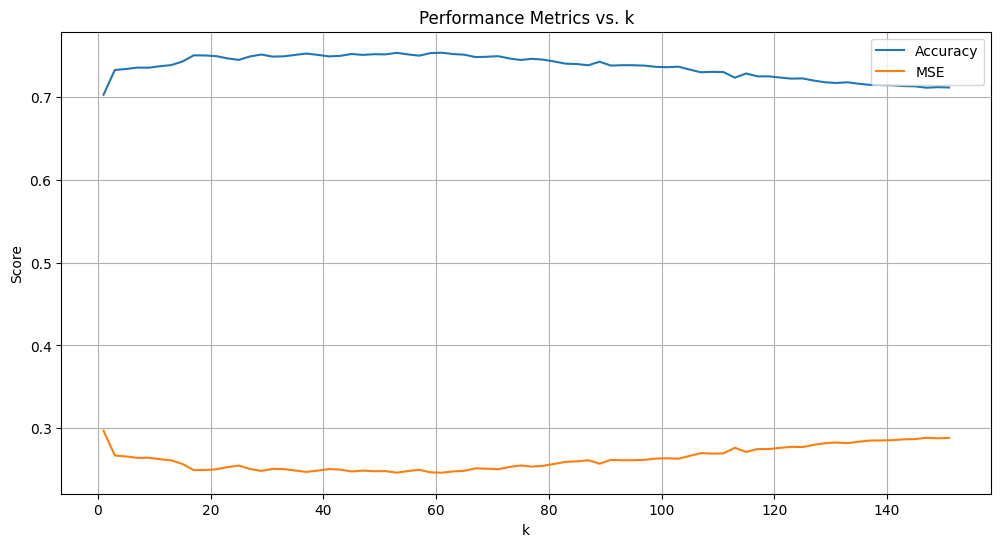

In [41]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(results_find_k_df.index, results_find_k_df['accuracy'], label='Accuracy')
#plt.plot(results_find_k_df.index, results_find_k_df['precision'], label='Precision')
#plt.plot(results_find_k_df.index, results_find_k_df['recall'], label='Recall')
#plt.plot(results_find_k_df.index, results_find_k_df['f1_score'], label='F1 Score')
plt.plot(results_find_k_df.index, results_find_k_df['mse'], label='MSE')
#plt.plot(results_find_k_df.index, results_find_k_df['rmse'], label='RMSE')
#plt.plot(results_find_k_df.index, results_find_k_df['mae'], label='MAE')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.grid(True)
plt.show()

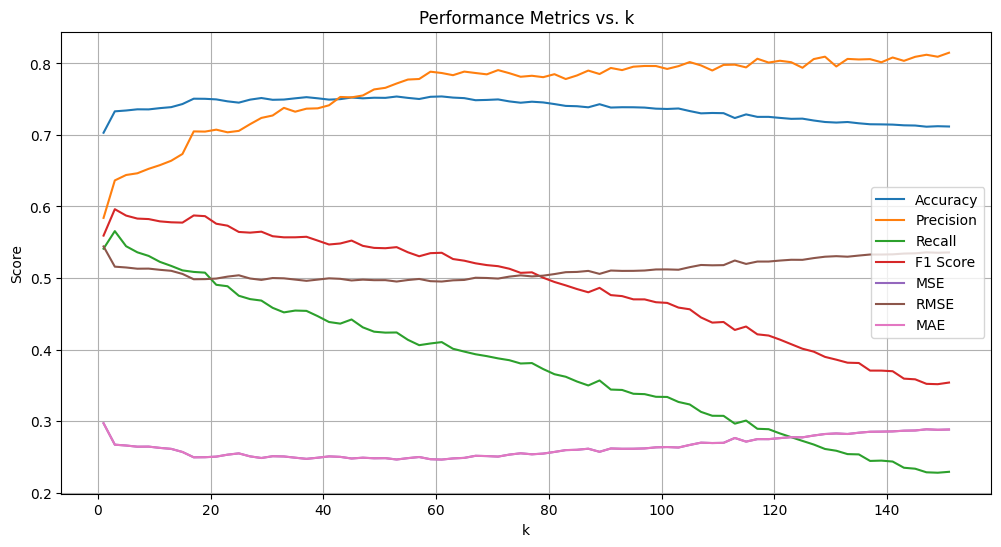

In [42]:
# plot the results
plt.figure(figsize=(12,6))
plt.plot(results_find_k_df.index, results_find_k_df['accuracy'], label='Accuracy')
plt.plot(results_find_k_df.index, results_find_k_df['precision'], label='Precision')
plt.plot(results_find_k_df.index, results_find_k_df['recall'], label='Recall')
plt.plot(results_find_k_df.index, results_find_k_df['f1_score'], label='F1 Score')
plt.plot(results_find_k_df.index, results_find_k_df['mse'], label='MSE')
plt.plot(results_find_k_df.index, results_find_k_df['rmse'], label='RMSE')
plt.plot(results_find_k_df.index, results_find_k_df['mae'], label='MAE')
plt.xlabel('k')
plt.ylabel('Score')
plt.title('Performance Metrics vs. k')
plt.legend()
plt.grid(True)
plt.show()

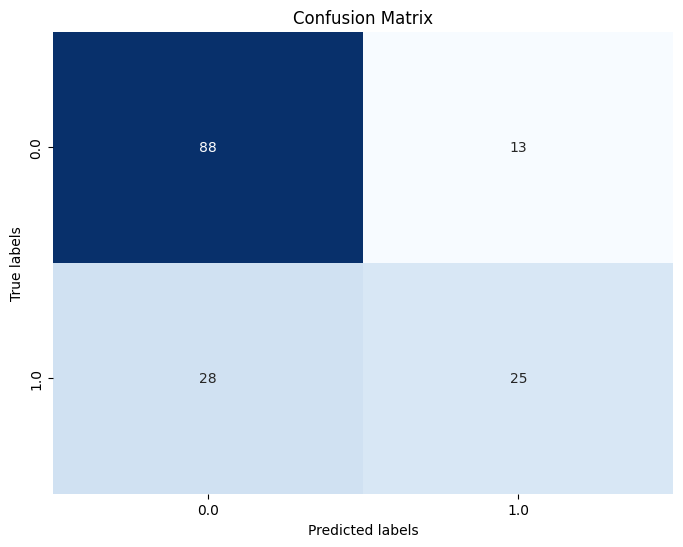

In [43]:
# with k = 19 create a konfusion matrix
knn = KNN(k=19)

np.random.shuffle(dataset)

X_train = dataset[:int(len(dataset)*SPLITRATIO), 0:8]
X_val = dataset[int(len(dataset)*SPLITRATIO):, 0:8]
Y_train = dataset[:int(len(dataset)*SPLITRATIO), 8]
Y_val = dataset[int(len(dataset)*SPLITRATIO):, 8]

knn.fit(X_train, Y_train)

y_pred = knn.predict(X_val)

# Create a confusion matrix with only nympy

def confusion_matrix_1(y_true, y_pred):
    classes = np.unique(y_true)
    n_classes = len(classes)
    matrix = np.zeros((n_classes, n_classes))
    
    for i in range(n_classes):
        for j in range(n_classes):
            matrix[i, j] = np.sum((y_true == classes[i]) & (y_pred == classes[j]))
    
    return matrix

confusion_matrix_1(Y_val, y_pred)

# plot the confusion matrix
import seaborn as sns

cm = confusion_matrix_1(Y_val, y_pred)

plt.figure(figsize=(8, 6))
c = sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(Y_val), yticklabels=np.unique(Y_val))
# remove the gradient bar
c.collections[0].colorbar.remove()
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## 5.5 Model Testing
<!--
- Evaluate the final model on the test dataset.
- Ensure that the model generalizes well to unseen data.
-->

## 5.6 Model Interpretation (Optional)
<!--
- Interpret the model results (e.g., feature importance, SHAP values).
- Discuss the strengths and limitations of the model.
-->

---

# 6. Predictions


## 6.1 Make Predictions
<!--
- Use the trained model to make predictions on new/unseen data.
-->

## 6.2 Save Model and Results
<!--
- Save the trained model to disk for future use.
- Export prediction results for further analysis.
-->

---

# 7. Documentation and Reporting

## 7.1 Summary of Findings
<!--
- Summarize the results and findings of the analysis.
-->

## 7.2 Next Steps
<!--
- Suggest further improvements, alternative models, or future work.
-->

## 7.3 References
<!--
- Cite any resources, papers, or documentation used.
-->